#### Importing Libraries

In [1]:
# Importing pandas for data manipulation
import pandas as pd

# Importing numpy for numerical operations
import numpy as np

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Importing seaborn for enhanced statistical data visualization
import seaborn as sns

# Setting seaborn default styling for plots
sns.set()

# Importing KNNImputer for handling missing data using K-nearest neighbors
from sklearn.impute import KNNImputer

# Importing XGBClassifier for gradient boosting classification model
from xgboost import XGBClassifier

# Importing RandomForestClassifier for ensemble tree-based classification
from sklearn.ensemble import RandomForestClassifier

# Importing train_test_split to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Importing LogisticRegression for logistic regression classification model
from sklearn.linear_model import LogisticRegression

# Importing classification_report to generate detailed classification metrics
from sklearn.metrics import classification_report

# Confusion Matrix Visualization for Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score

# Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE

# Hyperparameter Optimization for Random Forest
from sklearn.model_selection import GridSearchCV

# Importing warnings module to control warning messages
import warnings

# Suppressing all warnings to keep output clean
warnings.filterwarnings("ignore")


#### Loading dataset

In [2]:
# Reading the second sheet (sheet index 1) from the Excel file into a pandas DataFrame
dataset = pd.read_excel("dataset/E Commerce Dataset.xlsx", sheet_name=1)

In [3]:
# Displaying the first 5 rows of the dataset to get an overview of the data
dataset.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [4]:
# Checking if there are any duplicate values in the 'CustomerID' column
dataset['CustomerID'].duplicated().any()

False

In [5]:
# Dropping the 'CustomerID' column from the dataset as it's likely not useful for modeling
dataset = dataset.drop('CustomerID', axis=1)

#### EDA

In [6]:
# Displaying the shape of the dataset (number of rows and columns)
dataset.shape

(5630, 19)

In [7]:
# Displaying information about the dataset, including column names, data types, and non-null counts
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

#### Checking for Null values

In [8]:
# Counting missing (null) values in each column and sorting them in descending order
dataset.isnull().sum().sort_values(ascending=False)

DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
Churn                            0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

In [9]:
# Generating descriptive statistics for numerical columns (count, mean, std, min, max, etc.)
dataset.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


##### Checking for class imbalance

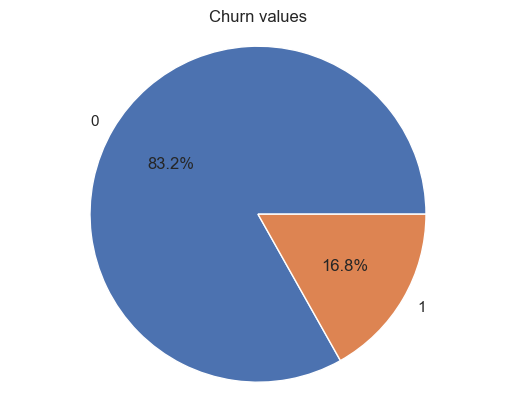

In [10]:
# Defining a function to plot a pie chart for the given column in the dataset
def plot_pie_chart(dataset, column_name):
    # Count the number of occurrences for each unique value in the 'Churn' column
    column_counts = dataset['Churn'].value_counts()

    # Plotting a pie chart using the counts, with labels and percentage display
    plt.pie(column_counts.values, labels=column_counts.index, autopct='%1.1f%%')

    # Setting the title of the pie chart
    plt.title(f'Churn values')

    # Ensuring the pie chart is a circle
    plt.axis('equal')

    # Display the pie chart
    plt.show()

# Calling the function to plot the pie chart for the 'Churn' column
plot_pie_chart(dataset, 'Churn')


In [11]:
# # Separating columns based on number of unique values
# count_col = []  # For categorical-like columns (≤ 20 unique values)
# hist_col = []   # For numerical-like columns (> 20 unique values)

# for column in dataset.columns:
#     unique_value = dataset[column].nunique()
#     if unique_value <= 20:
#         count_col.append(column)
#     else:
#         hist_col.append(column)

# # Plotting count plots for each categorical column
# plt.figure(figsize=(15, 40))  # Set the figure size
# plot_num = 1

# for col in count_col:
#     plt.subplot(10, 2, plot_num)  # Creating a subplot grid: 10 rows, 2 columns
#     sns.countplot(data=dataset, x=col)
#     plt.title(f'Countplot of {col}')
#     plt.xticks(rotation=45)  # Rotating x-axis labels for better visibility
#     plot_num += 1
#     plt.tight_layout()  # Adjusting layout to avoid overlapping


#### Removing Duplicates form Categorical columns

In [12]:
# Identifying categorical columns by selecting columns with dtype 'object'
categorical_cols = dataset.dtypes[dataset.dtypes == 'object'].index

# Loop through each categorical column
for i in categorical_cols:
    # Printing column name and its unique values
    print(f"{i} ---> {dataset[i].unique()}")
    print()  # Printing a blank line for better readability between columns


PreferredLoginDevice ---> ['Mobile Phone' 'Phone' 'Computer']

PreferredPaymentMode ---> ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']

Gender ---> ['Female' 'Male']

PreferedOrderCat ---> ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']

MaritalStatus ---> ['Single' 'Divorced' 'Married']



In [13]:
# Looping through each categorical column to clean text data
for i in categorical_cols:
    # Converting each value to lowercase and replace spaces with underscores
    dataset[i] = dataset[i].apply(lambda x: x.lower().replace(" ", "_"))


In [14]:
# Replacing "phone" with "mobile_phone" in 'PreferredLoginDevice' column to unify naming
dataset["PreferredLoginDevice"].replace("phone", "mobile_phone", inplace=True)

# Replacing abbreviations "cc" and "cod" with full forms "credit_card" and "cash_on_delivery" in 'PreferredPaymentMode' column
dataset["PreferredPaymentMode"].replace(["cc", "cod"], ["credit_card", "cash_on_delivery"], inplace=True)

# Correcting spelling/formatting by replacing "mobile_phone" with "mobile" in 'PreferedOrderCat' column
dataset["PreferedOrderCat"].replace("mobile_phone", "mobile", inplace=True)


In [15]:
# Looping through each column name in the list categorical_cols
for i in categorical_cols:
    # Print the column name followed by its unique values in the dataset
    print(f"{i} ---> {dataset[i].unique()}")
    # Print a blank line for better readability between columns
    print()


PreferredLoginDevice ---> ['mobile_phone' 'computer']

PreferredPaymentMode ---> ['debit_card' 'upi' 'credit_card' 'cash_on_delivery' 'e_wallet']

Gender ---> ['female' 'male']

PreferedOrderCat ---> ['laptop_&_accessory' 'mobile' 'others' 'fashion' 'grocery']

MaritalStatus ---> ['single' 'divorced' 'married']



In [16]:
# Encoding categorical columns before handling missing values
dataset = pd.get_dummies(dataset, drop_first = True)

In [17]:
# corr_matrix = dataset.corr()

# # Plotting the correlation heatmap
# plt.figure(figsize=(20, 12))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
# plt.title('Correlation Heatmap of Numerical Features')
# plt.show()

#### Handling Nan values

In [18]:
# Creating a KNNImputer object with 5 nearest neighbors for imputing missing values
impute = KNNImputer(n_neighbors = 5)

# Fiting the imputer on the dataset and transform it to fill missing values, returning a new array
dataset_imp = impute.fit_transform(dataset)


In [19]:
# Converting the imputed NumPy array back into a DataFrame with the original dataset’s column names
dataset_imp = pd.DataFrame(dataset_imp, columns = dataset.columns)


In [20]:
# Displaying the first five rows of the imputed DataFrame to inspect the changes
dataset_imp.head()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_debit_card,PreferredPaymentMode_e_wallet,PreferredPaymentMode_upi,Gender_male,PreferedOrderCat_grocery,PreferedOrderCat_laptop_&_accessory,PreferedOrderCat_mobile,PreferedOrderCat_others,MaritalStatus_married,MaritalStatus_single
0,1.0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,11.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,10.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,15.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.0,6.4,1.0,30.0,2.0,4.0,3.0,6.0,1.0,14.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,23.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,12.0,2.4,3.0,5.0,3.0,0.0,11.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


#### Seperating data into data and labels

In [21]:
# Showing the column names of the imputed DataFrame
dataset_imp.columns

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount',
       'PreferredLoginDevice_mobile_phone', 'PreferredPaymentMode_credit_card',
       'PreferredPaymentMode_debit_card', 'PreferredPaymentMode_e_wallet',
       'PreferredPaymentMode_upi', 'Gender_male', 'PreferedOrderCat_grocery',
       'PreferedOrderCat_laptop_&_accessory', 'PreferedOrderCat_mobile',
       'PreferedOrderCat_others', 'MaritalStatus_married',
       'MaritalStatus_single'],
      dtype='object')

In [22]:
# Creating feature set 'x' by dropping the target column "Churn" from the imputed dataset
x = dataset_imp.drop(columns = ["Churn"])

# Converting categorical variables in 'x' to dummy/one-hot encoded variables, dropping the first category to avoid dummy variable trap
X = pd.get_dummies(x, drop_first = True)

# Set target variable 'y' as the "Churn" column from the imputed dataset
y = dataset_imp["Churn"]


#### Handling class Imbalance

Original Class Distribution:
Non-Churn (0): 4682 (83.2%)
Churn (1): 948 (16.8%)


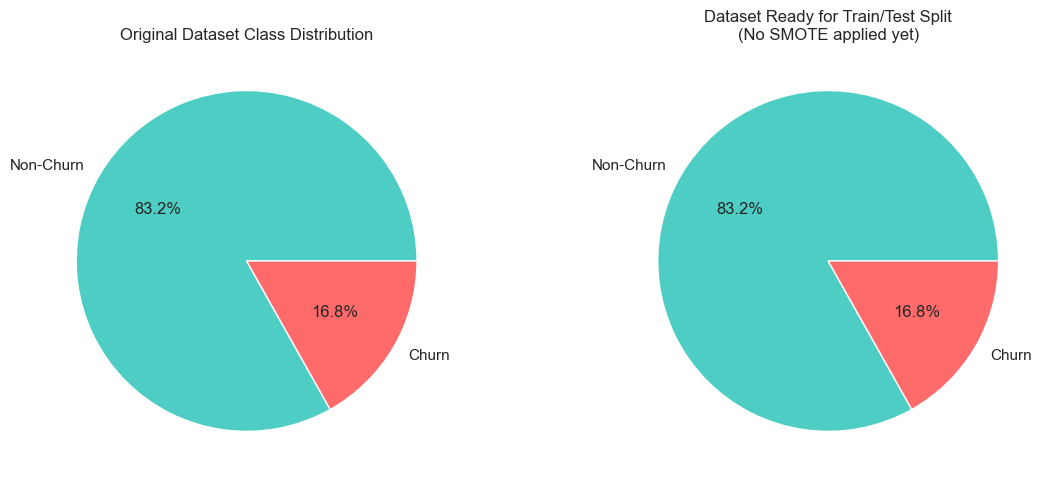

In [23]:
# Class Imbalance Analysis - BEFORE applying SMOTE
print("Original Class Distribution:")
print(f"Non-Churn (0): {(y == 0).sum()} ({(y == 0).mean():.1%})")
print(f"Churn (1): {(y == 1).sum()} ({(y == 1).mean():.1%})")

# Visualize original class imbalance
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.pie([(y == 0).sum(), (y == 1).sum()], 
        labels=['Non-Churn', 'Churn'], 
        autopct='%1.1f%%', 
        colors=['#4ECDC4', '#FF6B6B'])
plt.title('Original Dataset Class Distribution')

# IMPORTANT: We will NOT apply SMOTE here - we'll do it after splitting
# This prevents data leakage from synthetic samples

plt.subplot(1, 2, 2)
plt.pie([(y == 0).sum(), (y == 1).sum()], 
        labels=['Non-Churn', 'Churn'], 
        autopct='%1.1f%%', 
        colors=['#4ECDC4', '#FF6B6B'])
plt.title('Dataset Ready for Train/Test Split\n(No SMOTE applied yet)')

plt.tight_layout()
plt.show()

#### Spliting data in testing and training

In [24]:
# First split the ORIGINAL data (before SMOTE) to prevent data leakage
X_train_original, X_test, y_train_original, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

print("Train/Test Split Completed (Original Data):")
print(f"Training set: {X_train_original.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# NOW apply SMOTE ONLY to the training data to prevent leakage
smote = SMOTE(random_state=123)
X_train, y_train = smote.fit_resample(X_train_original, y_train_original)

print(f"\nAfter SMOTE on training data only:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples (unchanged - no synthetic data)")

# Verify class distribution
print(f"\nTraining set class distribution:")
print(f"Non-Churn (0): {(y_train == 0).sum()} ({(y_train == 0).mean():.1%})")
print(f"Churn (1): {(y_train == 1).sum()} ({(y_train == 1).mean():.1%})")

print(f"\nTest set class distribution (original):")
print(f"Non-Churn (0): {(y_test == 0).sum()} ({(y_test == 0).mean():.1%})")
print(f"Churn (1): {(y_test == 1).sum()} ({(y_test == 1).mean():.1%})")

Train/Test Split Completed (Original Data):
Training set: 4504 samples
Test set: 1126 samples

After SMOTE on training data only:
Training set: 7492 samples
Test set: 1126 samples (unchanged - no synthetic data)

Training set class distribution:
Non-Churn (0): 3746 (50.0%)
Churn (1): 3746 (50.0%)

Test set class distribution (original):
Non-Churn (0): 936 (83.1%)
Churn (1): 190 (16.9%)


### Implementing Models

#### Logistic Regression with Hyperparameter Optimization

In [25]:
# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

In [26]:
# Grid search for Logistic Regression with BETTER METRICS for imbalanced data
grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=123),
    param_grid_lr,
    cv=5,
    scoring=['f1', 'roc_auc', 'average_precision'],  # Multiple metrics
    refit='f1',  # Use F1 for final model selection
    n_jobs=-1
)

In [28]:

# Train the optimized model
grid_search_lr.fit(X_train, y_train)

# Get best model
log = grid_search_lr.best_estimator_

print("Best Logistic Regression Parameters:", grid_search_lr.best_params_)

Best Logistic Regression Parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


In [29]:
# Use the trained Logistic Regression model to predict target values for the test features
y_pred = log.predict(X_test)
# Printing a detailed classification report comparing the true test labels and predicted labels 
print(classification_report(y_test, y_pred))

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# # Calculate the F1 score of the model
# f1 = f1_score(y_test, y_pred)
# print(f"F1 Score: {f1:.2f}")

              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88       936
         1.0       0.47      0.78      0.59       190

    accuracy                           0.81      1126
   macro avg       0.71      0.80      0.73      1126
weighted avg       0.87      0.81      0.83      1126

Accuracy: 0.81


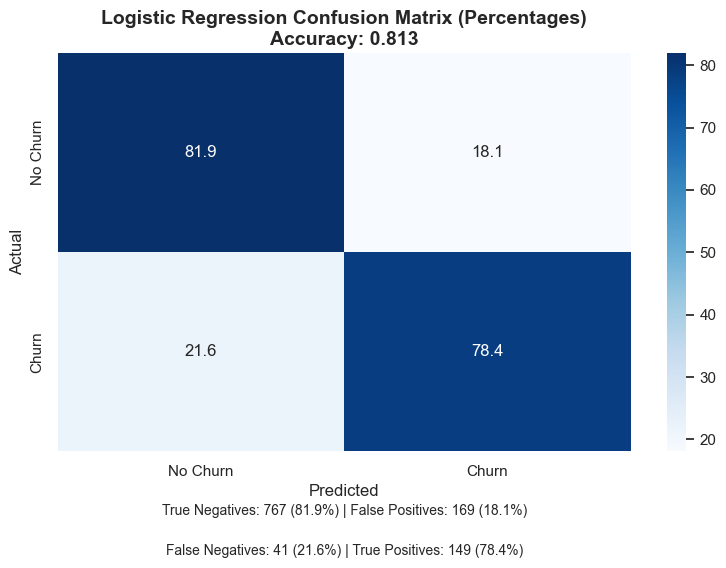

In [30]:
# Create confusion matrix for Logistic Regression with percentages
cm = confusion_matrix(y_test, y_pred)

# Calculate percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create the visualization with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title(f'Logistic Regression Confusion Matrix (Percentages)\nAccuracy: {accuracy_score(y_test, y_pred):.3f}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# Add text annotations for better interpretation
plt.text(0.5, -0.15, f'True Negatives: {cm[0,0]} ({cm_percent[0,0]:.1f}%) | False Positives: {cm[0,1]} ({cm_percent[0,1]:.1f}%)', 
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
plt.text(0.5, -0.25, f'False Negatives: {cm[1,0]} ({cm_percent[1,0]:.1f}%) | True Positives: {cm[1,1]} ({cm_percent[1,1]:.1f}%)', 
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

#### Feature Importance

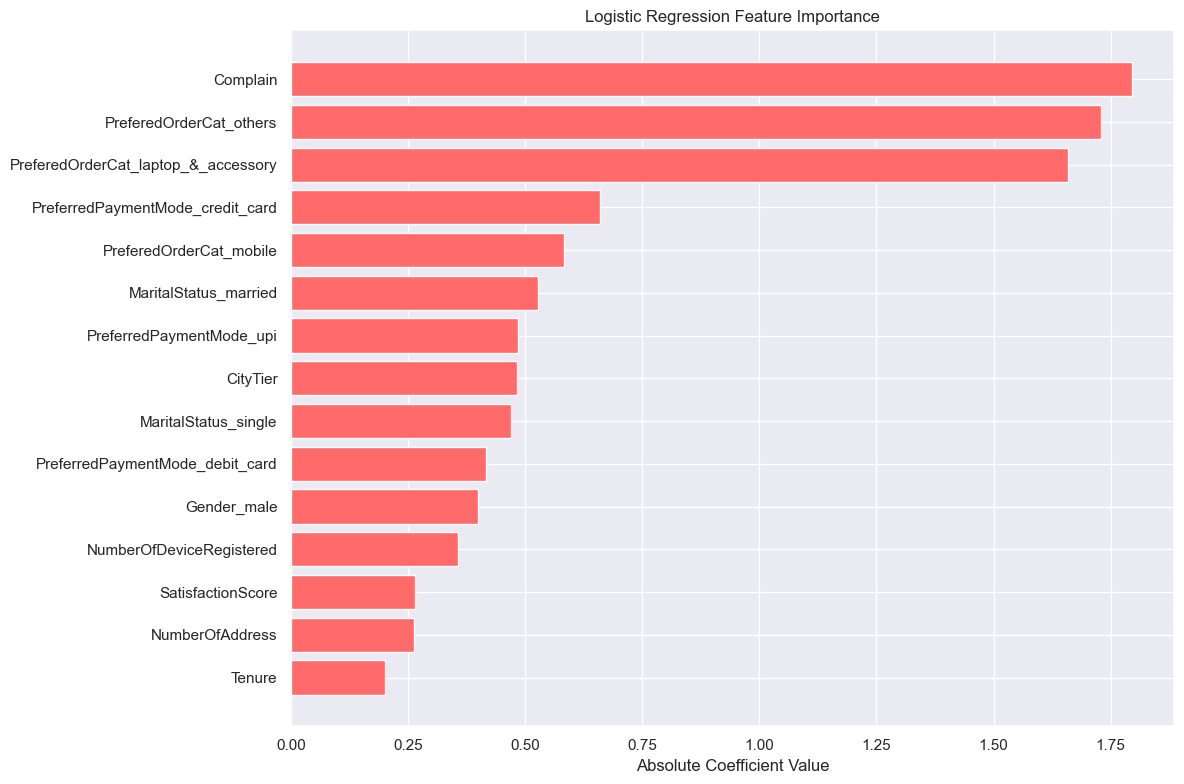

In [31]:
# Get feature importance from logistic regression coefficients
log_coef = log.coef_[0]
feature_importance_log = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(log_coef)
}).sort_values('importance', ascending=False)

# Plot feature importance for Logistic Regression
plt.figure(figsize=(12, 8))
top_features = feature_importance_log.head(15)
plt.barh(range(len(top_features)), top_features['importance'], color='#FF6B6B')
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Logistic Regression Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Random Forest

In [32]:
# Define parameter grid
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [20, 50, 100],
    'min_samples_leaf': [10, 20, 30]
}

# Grid search for Random Forest with BETTER METRICS
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=123),
    param_grid_rf,
    cv=5,
    scoring=['f1', 'roc_auc', 'average_precision'],  # Multiple metrics
    refit='f1',  # Use F1 for final model selection
    n_jobs=-1
)

grid_search_rf.fit(X_train, y_train)
# Predicting the target values for the test set using the trained Random Forest model
y_pred_rf = grid_search_rf.predict(X_test) 

print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Best Random Forest Score (F1):", grid_search_rf.best_score_)

# Printing a header for the Random Forest classification report
print("Random Forest Classification Report:")

# Printing the classification report comparing true and predicted test labels for the Random Forest model
print(classification_report(y_test, y_pred_rf))

Best Random Forest Parameters: {'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 20, 'n_estimators': 100}
Best Random Forest Score (F1): 0.9122791214311773
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       936
         1.0       0.73      0.76      0.75       190

    accuracy                           0.91      1126
   macro avg       0.84      0.85      0.85      1126
weighted avg       0.91      0.91      0.91      1126



##### confusion matrix for Random Forest

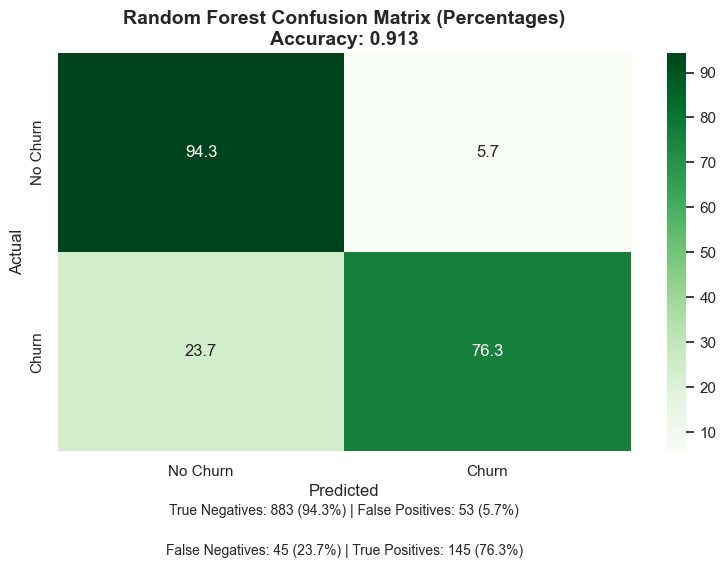

In [33]:
# Create confusion matrix for Random Forest with percentages
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Calculate percentages
cm_rf_percent = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis] * 100

# Create the visualization with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_percent, annot=True, fmt='.1f', cmap='Greens', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title(f'Random Forest Confusion Matrix (Percentages)\nAccuracy: {accuracy_score(y_test, y_pred_rf):.3f}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# Add text annotations for better interpretation
plt.text(0.5, -0.15, f'True Negatives: {cm_rf[0,0]} ({cm_rf_percent[0,0]:.1f}%) | False Positives: {cm_rf[0,1]} ({cm_rf_percent[0,1]:.1f}%)', 
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
plt.text(0.5, -0.25, f'False Negatives: {cm_rf[1,0]} ({cm_rf_percent[1,0]:.1f}%) | True Positives: {cm_rf[1,1]} ({cm_rf_percent[1,1]:.1f}%)', 
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

#### XGBoost Classifier

In [34]:
# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [35]:
# Grid search for XGBoost with BETTER METRICS
grid_search_xgb = GridSearchCV(
    XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss'),
    param_grid_xgb,
    cv=5,
    scoring=['f1', 'roc_auc', 'average_precision'],
    refit='f1',  # Use F1 for final model selection
    n_jobs=-1
)

In [36]:

# Train the optimized model
grid_search_xgb.fit(X_train, y_train)

# Get best model
xgb = grid_search_xgb.best_estimator_

print("Best XGBoost Parameters:", grid_search_xgb.best_params_)

Best XGBoost Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}


In [37]:
# Training (fit) the XGBoost model on the training data
xgb.fit(X_train, y_train)  # Use corrected variable names

# Predicting the target values for the test set using the trained XGBoost model
y_pred_xgb = xgb.predict(X_test)  # Use corrected variable names

# Printing a header for the XGBoost classification report
print("XGBoost Classification Report:")

# Printing the classification report comparing true and predicted test labels for the XGBoost model
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       936
         1.0       0.89      0.79      0.84       190

    accuracy                           0.95      1126
   macro avg       0.92      0.88      0.90      1126
weighted avg       0.95      0.95      0.95      1126



##### confusion matrix for XGBoost

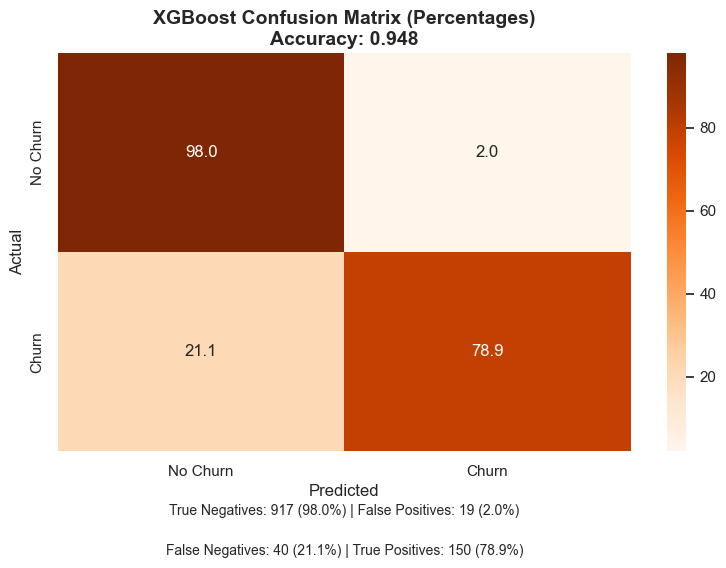

In [38]:
# Create confusion matrix for XGBoost with percentages
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Calculate percentages
cm_xgb_percent = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis] * 100

# Create the visualization with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_percent, annot=True, fmt='.1f', cmap='Oranges', 
            xticklabels=['No Churn', 'Churn'], 
            yticklabels=['No Churn', 'Churn'])
plt.title(f'XGBoost Confusion Matrix (Percentages)\nAccuracy: {accuracy_score(y_test, y_pred_xgb):.3f}', 
          fontsize=14, fontweight='bold')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)

# Add text annotations for better interpretation
plt.text(0.5, -0.15, f'True Negatives: {cm_xgb[0,0]} ({cm_xgb_percent[0,0]:.1f}%) | False Positives: {cm_xgb[0,1]} ({cm_xgb_percent[0,1]:.1f}%)', 
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)
plt.text(0.5, -0.25, f'False Negatives: {cm_xgb[1,0]} ({cm_xgb_percent[1,0]:.1f}%) | True Positives: {cm_xgb[1,1]} ({cm_xgb_percent[1,1]:.1f}%)', 
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout()
plt.show()

#### Model Performance Comparison

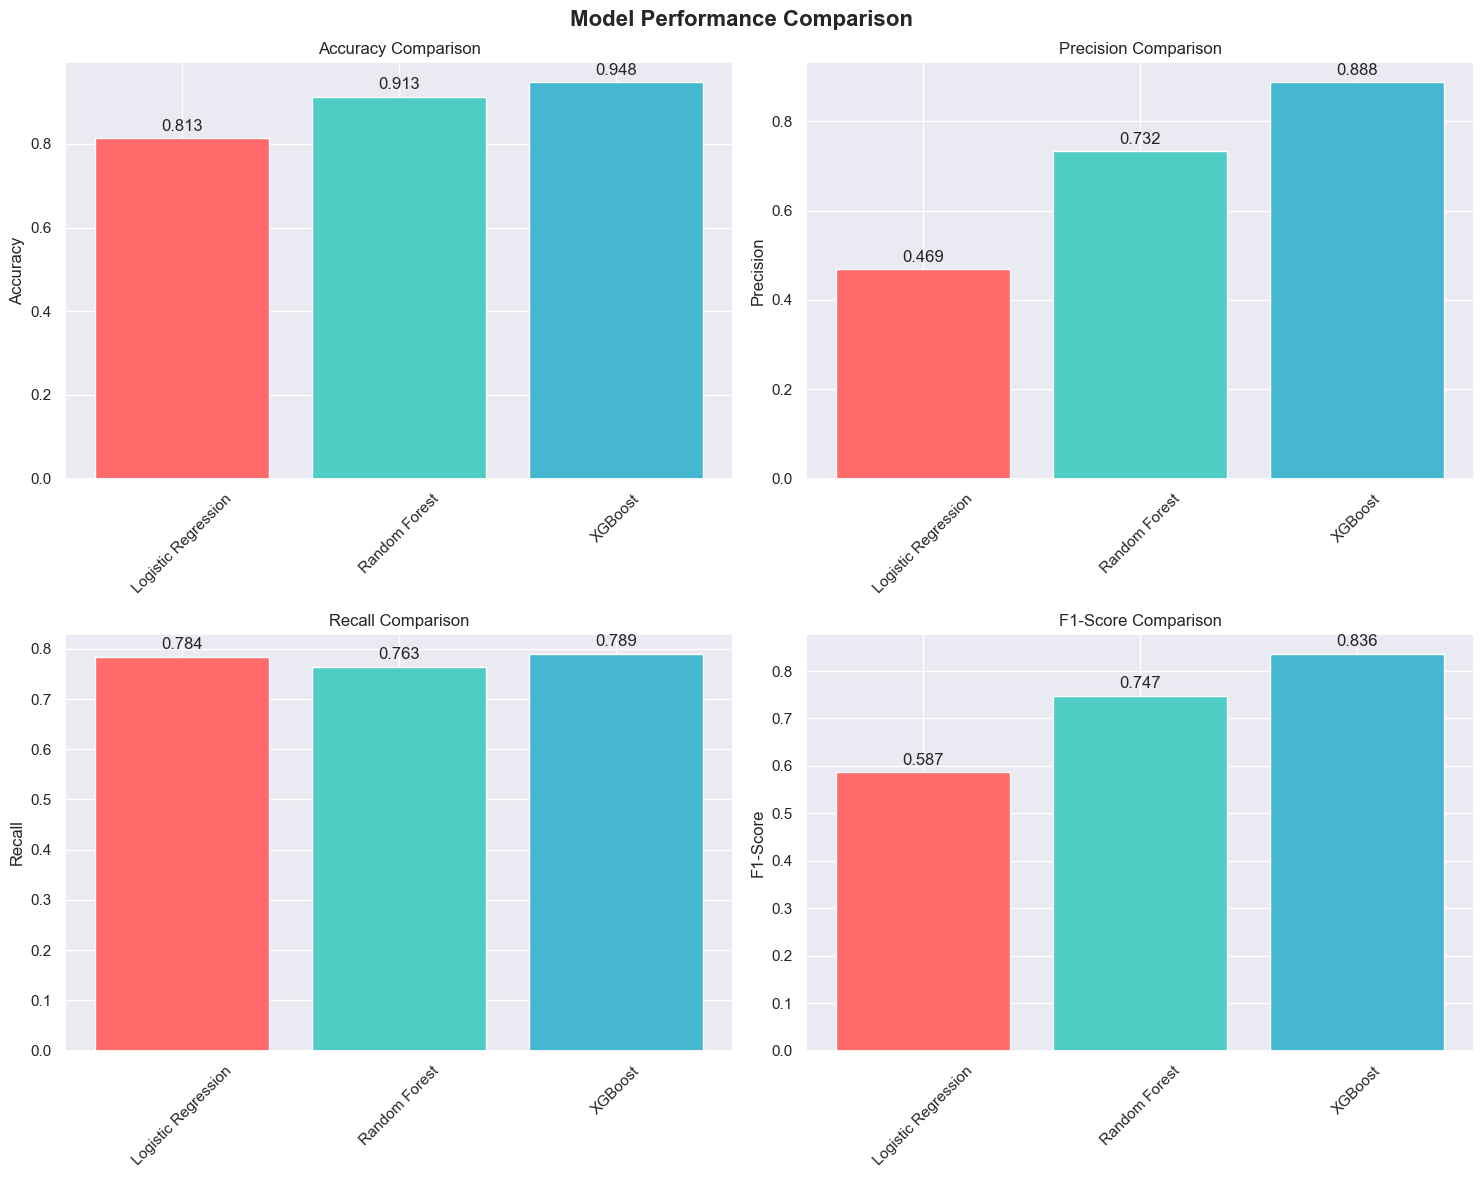

In [39]:
# Model Performance Comparison Visualization
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate metrics for all models
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
predictions = [y_pred, y_pred_rf, y_pred_xgb]

# Calculate metrics
accuracies = []
precisions = []
recalls = []
f1_scores = []

for pred in predictions:
    accuracies.append(accuracy_score(y_test, pred))
    precisions.append(precision_score(y_test, pred))
    recalls.append(recall_score(y_test, pred))
    f1_scores.append(f1_score(y_test, pred))

# Create comparison plot
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# Accuracy comparison
axes[0,0].bar(models, accuracies, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0,0].set_title('Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')
axes[0,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(accuracies):
    axes[0,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Precision comparison
axes[0,1].bar(models, precisions, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0,1].set_title('Precision Comparison')
axes[0,1].set_ylabel('Precision')
axes[0,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(precisions):
    axes[0,1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# Recall comparison
axes[1,0].bar(models, recalls, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1,0].set_title('Recall Comparison')
axes[1,0].set_ylabel('Recall')
axes[1,0].tick_params(axis='x', rotation=45)
for i, v in enumerate(recalls):
    axes[1,0].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

# F1-Score comparison
axes[1,1].bar(models, f1_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1,1].set_title('F1-Score Comparison')
axes[1,1].set_ylabel('F1-Score')
axes[1,1].tick_params(axis='x', rotation=45)
for i, v in enumerate(f1_scores):
    axes[1,1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Confusion Matrix

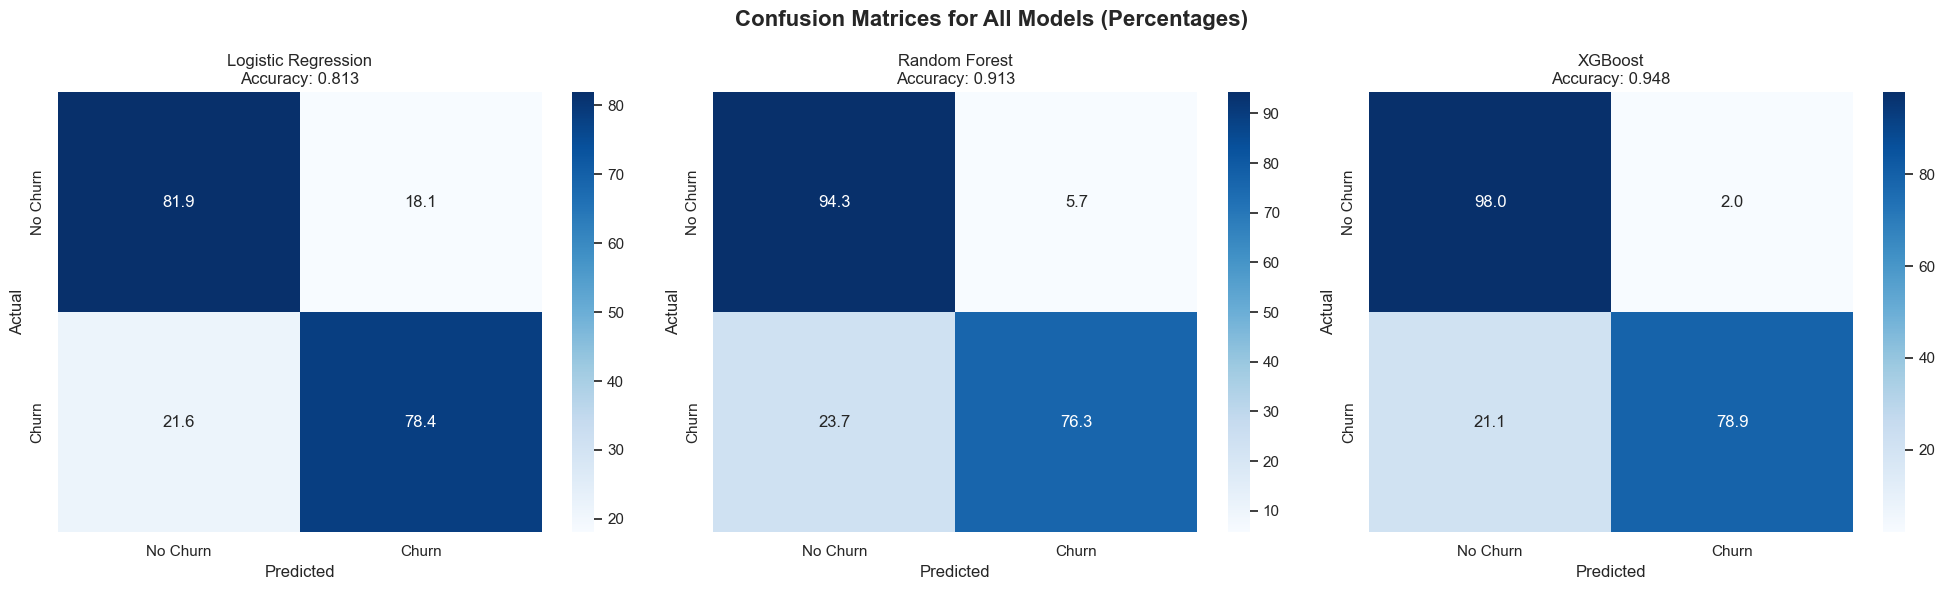

In [40]:
# Confusion Matrix Visualization with Percentages
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Confusion Matrices for All Models (Percentages)', fontsize=16, fontweight='bold')

model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
predictions = [y_pred, y_pred_rf, y_pred_xgb]

for i, (name, pred) in enumerate(zip(model_names, predictions)):
    cm = confusion_matrix(y_test, pred)
    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues', 
                xticklabels=['No Churn', 'Churn'], 
                yticklabels=['No Churn', 'Churn'],
                ax=axes[i])
    axes[i].set_title(f'{name}\nAccuracy: {accuracy_score(y_test, pred):.3f}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

#### Feature Importance Visualization of RF and XGB

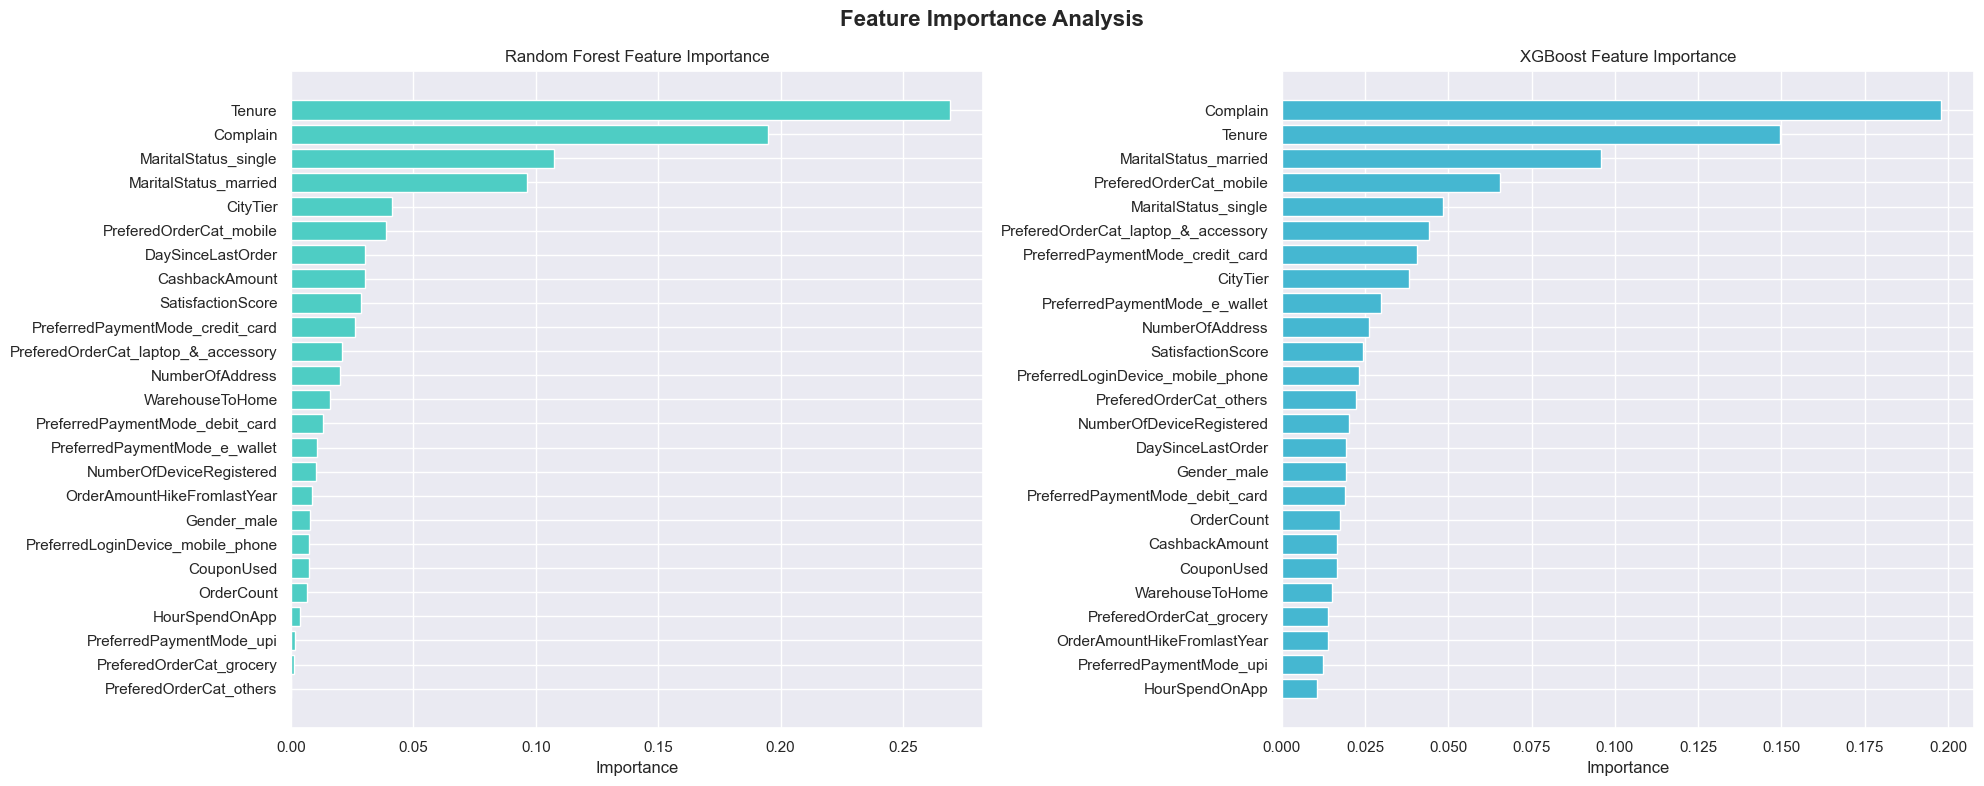

In [41]:
# Feature Importance Visualization
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Feature Importance Analysis', fontsize=16, fontweight='bold')
# Get the best Random Forest model after GridSearch
rf = grid_search_rf.best_estimator_

# Random Forest Feature Importance
rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=True)

axes[0].barh(range(len(rf_importance)), rf_importance['importance'], color='#4ECDC4')
axes[0].set_yticks(range(len(rf_importance)))
axes[0].set_yticklabels(rf_importance['feature'])
axes[0].set_title('Random Forest Feature Importance')
axes[0].set_xlabel('Importance')

# XGBoost Feature Importance
xgb_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=True)

axes[1].barh(range(len(xgb_importance)), xgb_importance['importance'], color='#45B7D1')
axes[1].set_yticks(range(len(xgb_importance)))
axes[1].set_yticklabels(xgb_importance['feature'])
axes[1].set_title('XGBoost Feature Importance')
axes[1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

#### ROC Curve and AUC Comparison

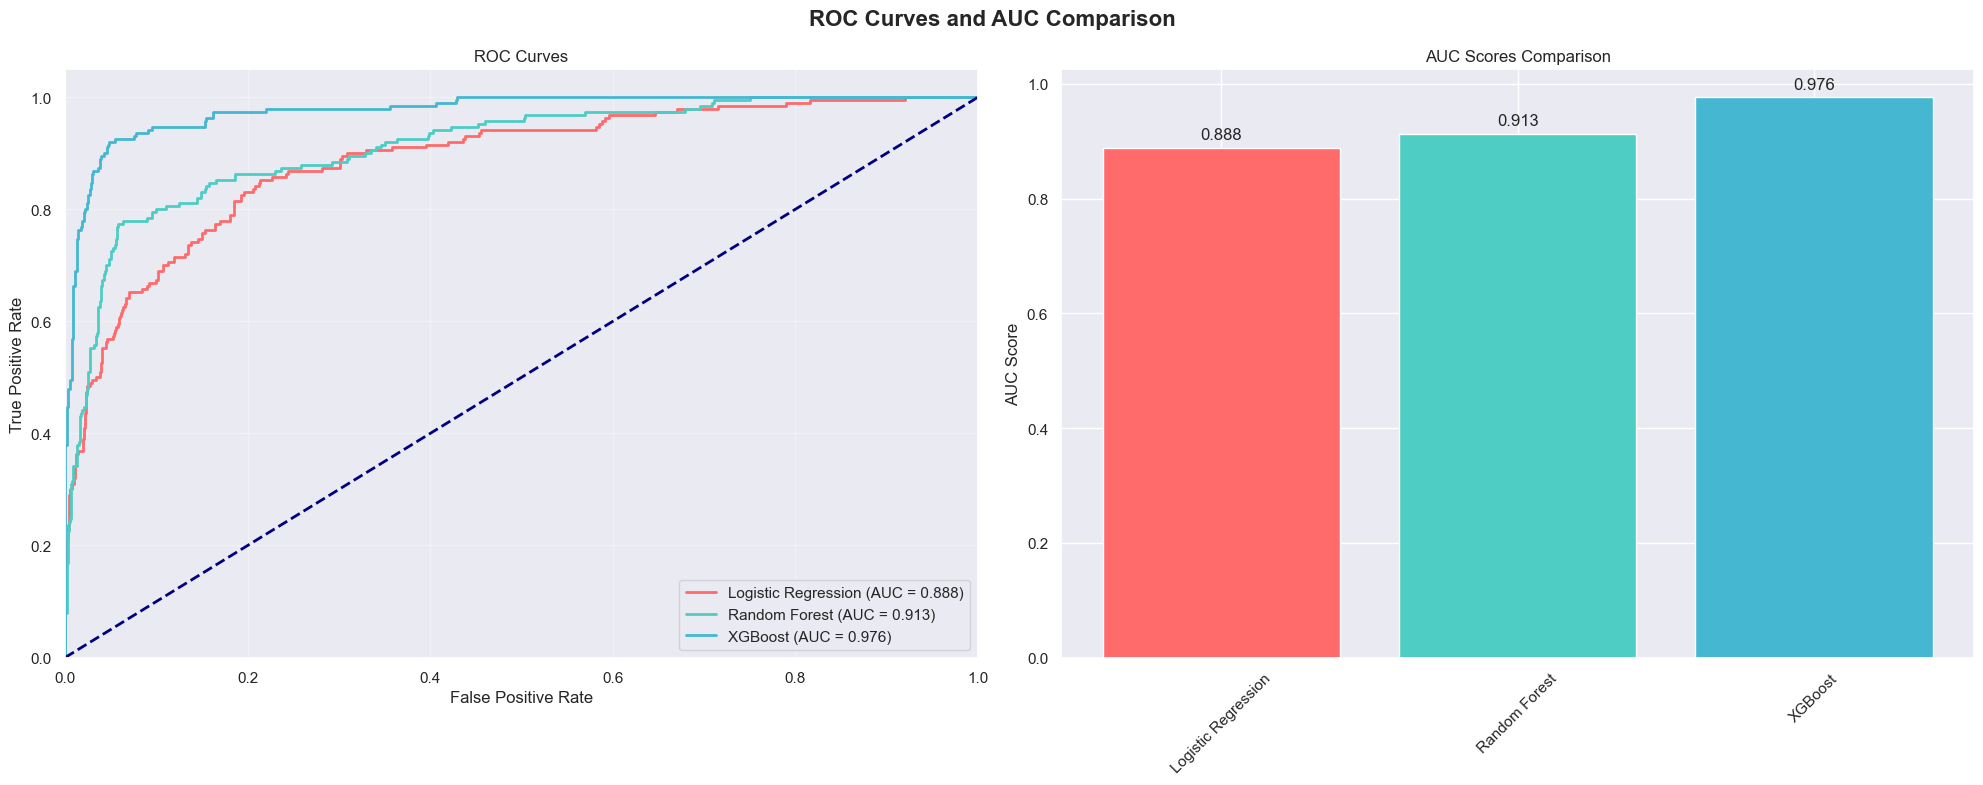

In [44]:
# ROC Curve and AUC Comparison
from sklearn.metrics import roc_curve, auc

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('ROC Curves and AUC Comparison', fontsize=16, fontweight='bold')

# ROC Curves
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']
predictions = [y_pred, y_pred_rf, y_pred_xgb]

for i, (name, pred, color) in enumerate(zip(model_names, predictions, colors)):
    # Get probability predictions for ROC curve
    if name == 'Logistic Regression':
        proba = log.predict_proba(X_test)[:, 1]
    elif name == 'Random Forest':
        proba = rf.predict_proba(X_test)[:, 1]
    else:
        proba = xgb.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    
    axes[0].plot(fpr, tpr, color=color, lw=2, 
                 label=f'{name} (AUC = {roc_auc:.3f})')

axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curves')
axes[0].legend(loc="lower right")
axes[0].grid(True, alpha=0.3)

# AUC Comparison Bar Plot
auc_scores = []
for name in model_names:
    if name == 'Logistic Regression':
        proba = log.predict_proba(X_test)[:, 1]
    elif name == 'Random Forest':
        proba = rf.predict_proba(X_test)[:, 1]
    else:
        proba = xgb.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc_scores.append(auc(fpr, tpr))

axes[1].bar(model_names, auc_scores, color=colors)
axes[1].set_title('AUC Scores Comparison')
axes[1].set_ylabel('AUC Score')
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(auc_scores):
    axes[1].text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

#### Model Performance Summary Table

Model Performance Summary:
              Model  Accuracy  Precision  Recall  F1-Score    AUC
Logistic Regression    0.8135     0.4686  0.7842    0.5866 0.8879
      Random Forest    0.9130     0.7323  0.7632    0.7474 0.9133
            XGBoost    0.9476     0.8876  0.7895    0.8357 0.9764


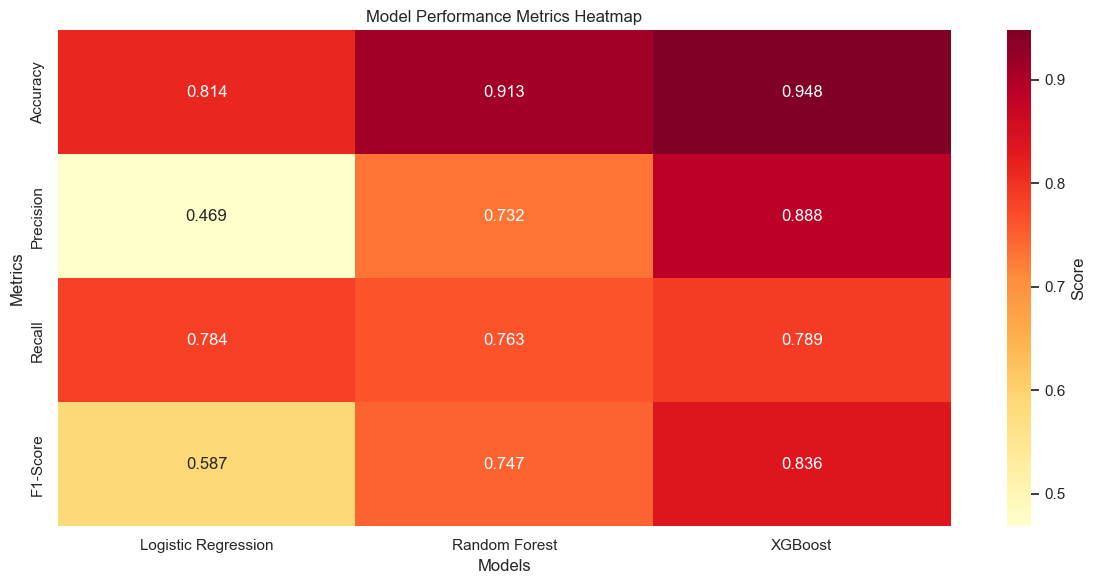

In [45]:
# Model Performance Summary Table
from sklearn.metrics import classification_report
import pandas as pd

# Create a summary dataframe
summary_data = []
for i, (name, pred) in enumerate(zip(model_names, predictions)):
    report = classification_report(y_test, pred, output_dict=True)
    
    summary_data.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, pred),
        'Precision': precision_score(y_test, pred),
        'Recall': recall_score(y_test, pred),
        'F1-Score': f1_score(y_test, pred),
        'AUC': auc_scores[i]
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.round(4)

# Display the summary table
print("Model Performance Summary:")
print("=" * 80)
print(summary_df.to_string(index=False))
print("=" * 80)

# Create a heatmap of the metrics
plt.figure(figsize=(12, 6))
metrics_df = summary_df.set_index('Model').drop('AUC', axis=1)
sns.heatmap(metrics_df.T, annot=True, cmap='YlOrRd', fmt='.3f', cbar_kws={'label': 'Score'})
plt.title('Model Performance Metrics Heatmap')
plt.ylabel('Metrics')
plt.xlabel('Models')
plt.tight_layout()
plt.show()

In [46]:
# Additional Evaluation Metrics for Imbalanced Classification
from sklearn.metrics import average_precision_score, roc_auc_score

print("Additional Metrics for Imbalanced Classification:")
print("=" * 80)

# Calculate additional metrics for all models
additional_metrics = []
for i, (name, pred) in enumerate(zip(model_names, predictions)):
    # Get probability predictions
    if name == 'Logistic Regression':
        proba = log.predict_proba(X_test)[:, 1]
    elif name == 'Random Forest':
        proba = rf.predict_proba(X_test)[:, 1]
    else:
        proba = xgb.predict_proba(X_test)[:, 1]
    
    # Calculate additional metrics
    roc_auc = roc_auc_score(y_test, proba)
    avg_precision = average_precision_score(y_test, proba)
    
    additional_metrics.append({
        'Model': name,
        'ROC-AUC': roc_auc,
        'Average Precision': avg_precision,
        'F1-Score': f1_score(y_test, pred)
    })

additional_df = pd.DataFrame(additional_metrics)
additional_df = additional_df.round(4)

print(additional_df.to_string(index=False))
print("=" * 80)
print("Note: Average Precision and ROC-AUC are better metrics for imbalanced datasets")
print("as they focus on the positive class (churn) detection.")

Additional Metrics for Imbalanced Classification:
              Model  ROC-AUC  Average Precision  F1-Score
Logistic Regression   0.8879             0.7093    0.5866
      Random Forest   0.9133             0.7538    0.7474
            XGBoost   0.9764             0.9183    0.8357
Note: Average Precision and ROC-AUC are better metrics for imbalanced datasets
as they focus on the positive class (churn) detection.
